PDB KASUS (RUNGE-KUTTA)

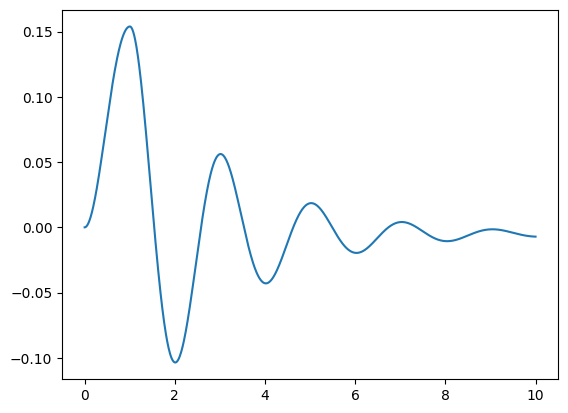

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def func (x,v,t):
    return v
def gunc (x,v,t):
    if t<=1:
        F = 5000
    else:
        F = 0
    m = 5000
    k = 50000
    c = 5000
    return (F - (c*v)-(k*x))/m

x0 = 0.0
t0 = 0.0
tn = 10.0
ndata = 1000
t = np.linspace(t0,tn,ndata)
h = t[2]-t[1]

v0 = 0.0
ndata = 1000
x = np.zeros(ndata)
x[0] = x0

v = np.zeros(ndata)
v[0] = v0

for i in range(ndata-1):
    k1 = h*func(x[i],v[i],t[i])
    l1 = h*gunc(x[i],v[i],t[i]) 

    k2 = h*func(x[i]+0.5*h , v[i]+0.5*l1 , t[i]+0.5*k1)
    l2 = h*gunc(x[i]+0.5*h , v[i]+0.5*l1 , t[i]+0.5*k1) 

    k3 = h*func(x[i]+0.5*h , v[i]+0.5*l2 , t[i]+0.5*k2)
    l3 = h*gunc(x[i]+0.5*h , v[i]+0.5*l2 , t[i]+0.5*k2)

    k4 = h*func(x[i]+ h , v[i]+l3 , t[i]+k3)
    l4 = h*gunc(x[i]+h , v[i]+l3 , t[i]+l3)

    l = (l1 + 2.0 * l3 + 2.0*l3 + l4)/6.0
    kutta = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0

    x[i+1] = x[i] + kutta
    v[i+1] = v[i] + l

plt.plot(t,x)
# plt.plot(t,v)
plt.show()



PDB KASUS (EULER)

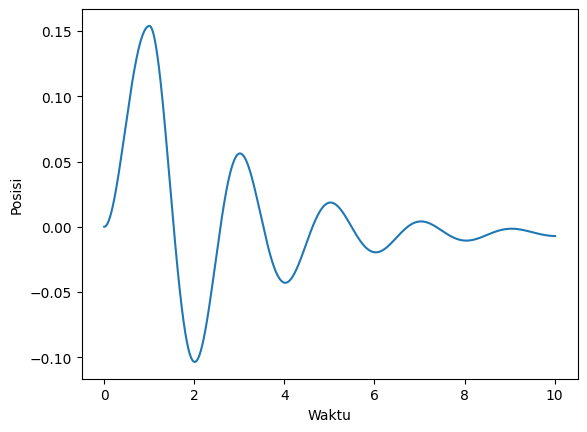

In [26]:
def forward_euler_kasus(x0,xn,v0,f,h):
    t_euler1 = [x0]
    x_euler1 = [v0]
    v_euler1 = [v0]
    step = int((xn-x0)/h)
    for i in range (step):
        t_baru=t[i]+ h
        x_baru=x[i]+ h * v[i]
        v_baru=v[i]+ h * f(x_euler1[i],v_euler1[i],t_euler1[i])
        t_euler1.append(t_baru)
        x_euler1.append(x_baru)
        v_euler1.append(v_baru)
    return t_euler1,x_euler1
def f(x,v,t):
    if t<=1:
        F = 5000
    else:
        F = 0
    m = 5000
    k = 50000
    c = 5000
    return (F - (c*v)-(k*x))/m
t0=0
t1=10
x0=0
v0=0
h=0.01
t_euler1, x_euler1 = forward_euler_kasus(t0,t1,x0,f,h)
plt.plot(t_euler1,x_euler1)
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.show()

PERBANDINGAN

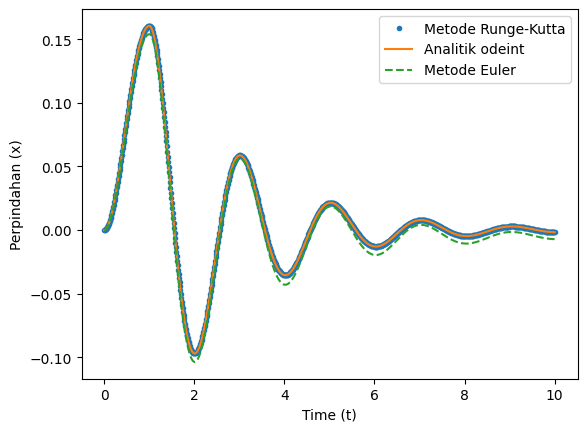

In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definisikan fungsi sistem
def system(y, t):
    x, v = y
    if t <= 1:
        F = 5000
    else:
        F = 0
    m = 5000
    k = 50000
    c = 5000
    dxdt = v
    dvdt = (F - c * v - k * x) / m
    return [dxdt, dvdt]

# Initial conditions / boundary condition / syarat batas
y0 = [0.0, 0.0]  # [x0, v0]
t_odeint = np.linspace(0, 10, 1000)

# ODEINT
sol = odeint(system, y0, t_odeint)

# hasil ODEINT
x_odeint = sol[:, 0]
v_odeint = sol[:, 1]

# definisikan fungsi
def func(x, v, t):
    return v

def gunc(x, v, t):
    if t <= 1:
        F = 5000
    else:
        F = 0
    m = 5000
    k = 50000
    c = 5000
    return (F - c * v - k * x) / m

# Initial conditions / boundary condition / syarat batas
x0 = 0.0
v0 = 0.0
t0 = 0.0
tn = 10.0
ndata = 1000
t_rk = np.linspace(t0, tn, ndata)
h = t_rk[1] - t_rk[0]

# Array kosongan
x_rk = np.zeros(ndata)
v_rk = np.zeros(ndata)
x_rk[0] = x0
v_rk[0] = v0

# Runge-Kutta metode
for i in range(ndata - 1):
    k1 = h * func(x_rk[i], v_rk[i], t_rk[i])
    l1 = h * gunc(x_rk[i], v_rk[i], t_rk[i])

    k2 = h * func(x_rk[i] + 0.5 * k1, v_rk[i] + 0.5 * l1, t_rk[i] + 0.5 * h)
    l2 = h * gunc(x_rk[i] + 0.5 * k1, v_rk[i] + 0.5 * l1, t_rk[i] + 0.5 * h)

    k3 = h * func(x_rk[i] + 0.5 * k2, v_rk[i] + 0.5 * l2, t_rk[i] + 0.5 * h)
    l3 = h * gunc(x_rk[i] + 0.5 * k2, v_rk[i] + 0.5 * l2, t_rk[i] + 0.5 * h)

    k4 = h * func(x_rk[i] + k3, v_rk[i] + l3, t_rk[i] + h)
    l4 = h * gunc(x_rk[i] + k3, v_rk[i] + l3, t_rk[i] + h)

    kutta = (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    l = (l1 + 2 * l2 + 2 * l3 + l4) / 6.0

    x_rk[i + 1] = x_rk[i] + kutta
    v_rk[i + 1] = v_rk[i] + l

# Plot hasil semua metode
plt.plot(t_rk, x_rk, '.',label="Metode Runge-Kutta")
plt.plot(t_odeint, x_odeint, '-', label="Analitik odeint")
plt.plot(t_euler1,x_euler1,'--' ,label="Metode Euler")
plt.xlabel('Time (t)')
plt.ylabel('Perpindahan (x)')
plt.legend()
plt.show()
